In [12]:
%matplotlib inline


Extracting brain signal from spheres
====================================

This example extract brain signals from spheres described by the coordinates
of their center in MNI space and a given radius in millimeters. In particular,
this example extracts signals from Default Mode Network regions and compute a
connectome from them.




Retrieve the dataset
---------------------



In [13]:
from nilearn import datasets
adhd_dataset = datasets.fetch_adhd(n_subjects=1)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      adhd_dataset.func[0])  # 4D data

First subject functional nifti image (4D) is at: /Users/Ralf/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


/Users/Ralf/anaconda3/lib/python3.6/site-packages/nilearn/datasets/func.py:501: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Coordinates of Default Mode Network
------------------------------------



In [14]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
          'Posterior Cingulate Cortex',
          'Left Temporoparietal junction',
          'Right Temporoparietal junction',
          'Medial prefrontal cortex',
         ]

Extracts signal from sphere around DMN seeds
---------------------------------------------



In [15]:
from nilearn import input_data

masker = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=2)

func_filename = adhd_dataset.func[0]
confound_filename = adhd_dataset.confounds[0]

time_series = masker.fit_transform(func_filename,
                                   confounds=[confound_filename])

[Memory]    0.0s, 0.0min: Loading filter_and_extract...


Display time series
--------------------



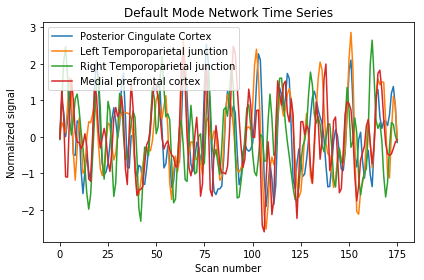

In [16]:
import matplotlib.pyplot as plt
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

Compute partial correlation matrix
-----------------------------------
Using object :class:`nilearn.connectome.ConnectivityMeasure`: Its
default covariance estimator is Ledoit-Wolf, allowing to obtain accurate
partial correlations.



In [17]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]

Display connectome
-------------------



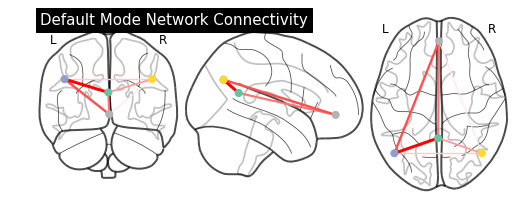

In [18]:
from nilearn import plotting

plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="Default Mode Network Connectivity")

Display connectome with hemispheric projections.
Notice (0, -52, 18) is included in both hemispheres since x == 0.



In [ ]:
plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="Connectivity projected on hemispheres",
                         display_mode='lyrz')

plotting.show()